## Goal: learn ImagedataGenerator
This script shows randomly generated images using various values of ImagedataGenerator from keras.preprocessing.image



Reference

[The Keras Blog]( https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

[Keras Documentations](https://keras.io/preprocessing/image/)

Read in the function that read in the original image, 
generate manuplated images and save them in a specified folder,


In [119]:
import os 
from keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img
def generate_plot_pics(datagen,orig_img):
    dir_augmented_data = "data/preview"
    try:
        ## if the preview folder does not exist, create
        os.mkdir(dir_augmented_data)
    except:
        ## if the preview folder exists, then remove
        ## the contents (pictures) in the folder
        for item in os.listdir(dir_augmented_data):
            os.remove(dir_augmented_data + "/" + item)

    ## convert the original image to array
    x = img_to_array(orig_img)
    ## reshape (Sampke, Nrow, Ncol, 3) 3 = R, G or B
    x = x.reshape((1,) + x.shape)
    ## -------------------------- ##
    ## randomly generate pictures
    ## -------------------------- ##
    i = 0
    Nplot = 8
    for batch in datagen.flow(x,batch_size=1,
                          save_to_dir=dir_augmented_data,
                          save_prefix="pic",
                          save_format='jpeg'):
        i += 1
        if i > Nplot - 1: ## generate 8 pictures 
            break

    ## -------------------------- ##
    ##   plot the generated data
    ## -------------------------- ##
    fig = plt.figure(figsize=(8, 6))
    fig.subplots_adjust(hspace=0.02,wspace=0.01,
                    left=0,right=1,bottom=0, top=1)

    ## original picture
    ax = fig.add_subplot(3, 3, 1,xticks=[],yticks=[])        
    ax.imshow(orig_img)
    ax.set_title("original")

    i = 2
    for imgnm in os.listdir(dir_augmented_data):
        ax = fig.add_subplot(3, 3, i,xticks=[],yticks=[]) 
        img = load_img(dir_augmented_data + "/" + imgnm)
        ax.imshow(img)
        i += 1
    plt.show()

We will use Taylor Swift's picture as an original picture

In [118]:
orig_img = load_img("data/TAYLOR-SWIFT.jpg")

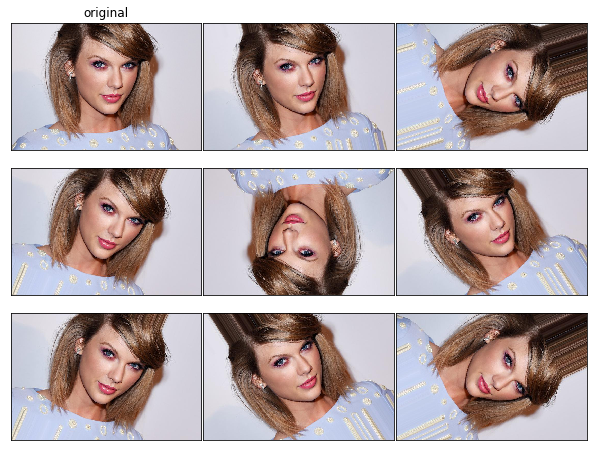

In [120]:
## rotation_range: Int. Degree range for random rotations.
datagen = ImageDataGenerator(rotation_range=180)
generate_plot_pics(datagen,orig_img)

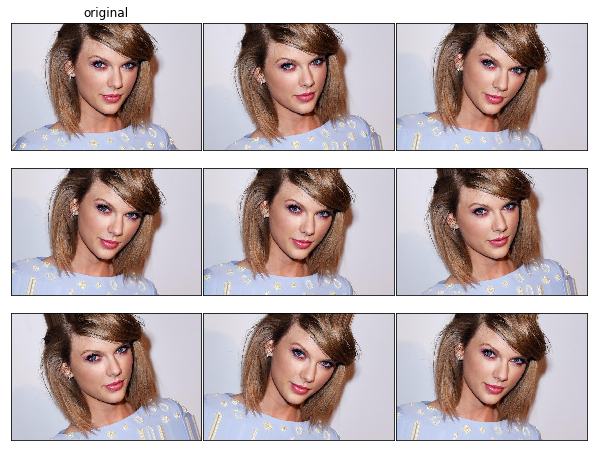

In [127]:
## rotation_range: Int. Degree range for random rotations.
datagen = ImageDataGenerator(rotation_range=20)
generate_plot_pics(datagen,orig_img)

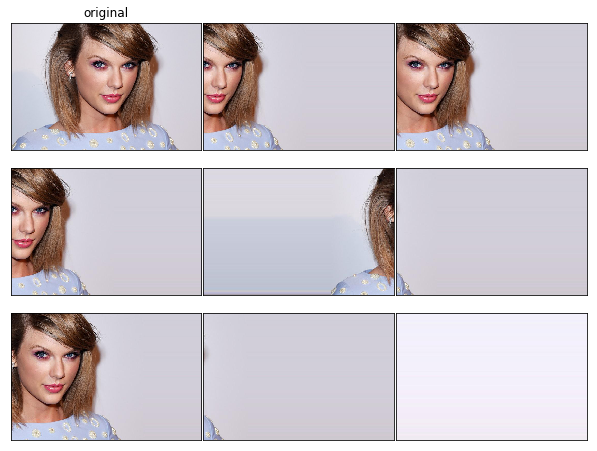

In [130]:
## width_shift_range: Float (fraction of total width). Range for random horizontal shifts.
datagen = ImageDataGenerator(width_shift_range=1)
generate_plot_pics(datagen,orig_img)

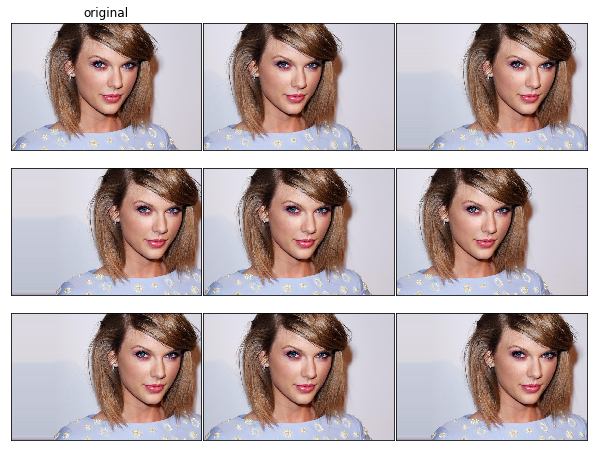

In [132]:
datagen = ImageDataGenerator(width_shift_range=0.25)
generate_plot_pics(datagen,orig_img)

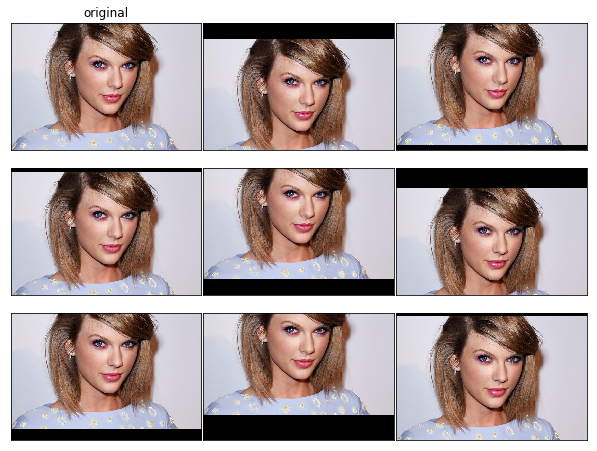

In [141]:
## height_shift_range: Float (fraction of total height). Range for random vertical shifts.
## fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}. Points outside the boundaries of the input are filled according to the given mode:
## "constant": kkkkkkkk|abcd|kkkkkkkk (cval=k)
## "nearest":  aaaaaaaa|abcd|dddddddd
## "reflect":  abcddcba|abcd|dcbaabcd
## "wrap":  abcdabcd|abcd|abcdabcd

datagen = ImageDataGenerator(height_shift_range=0.2,fill_mode="constant")
generate_plot_pics(datagen,orig_img)

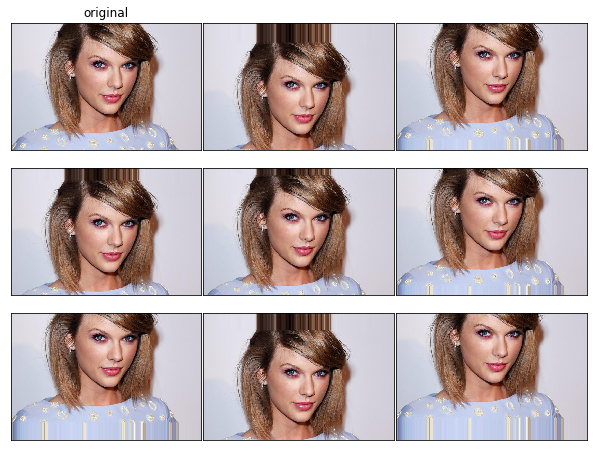

In [142]:
datagen = ImageDataGenerator(height_shift_range=0.2,fill_mode="nearest")
generate_plot_pics(datagen,orig_img)

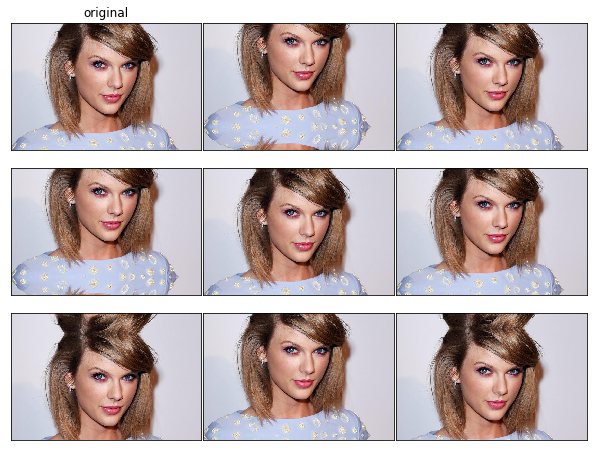

In [143]:
datagen = ImageDataGenerator(height_shift_range=0.2,fill_mode="reflect")
generate_plot_pics(datagen,orig_img)

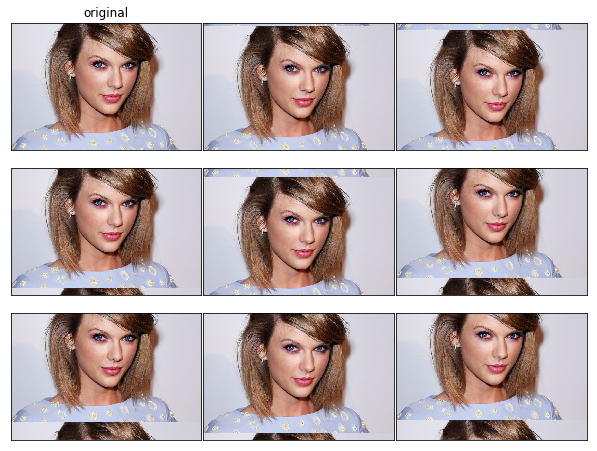

In [144]:
datagen = ImageDataGenerator(height_shift_range=0.2,fill_mode="wrap")
generate_plot_pics(datagen,orig_img)

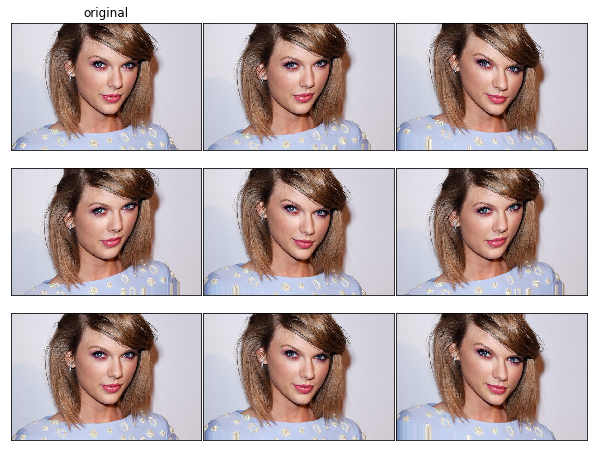

In [124]:
## shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
datagen = ImageDataGenerator(shear_range=0.2)
generate_plot_pics(datagen,orig_img)

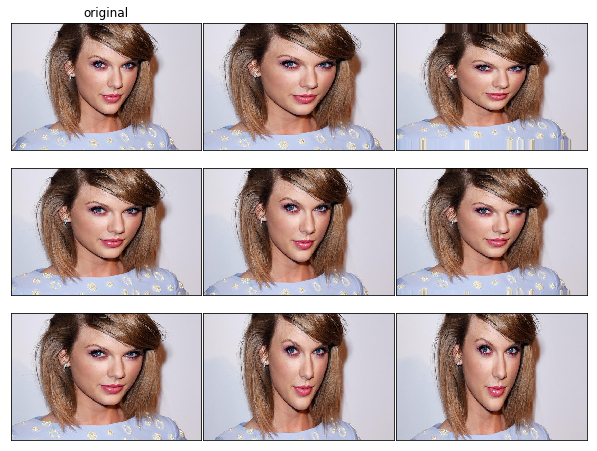

In [125]:
## zoom_range: Float or [lower, upper]. Range for random zoom. 
## If a float,  [lower, upper] = [1-zoom_range, 1+zoom_range].
datagen = ImageDataGenerator(zoom_range=0.2)
generate_plot_pics(datagen,orig_img)

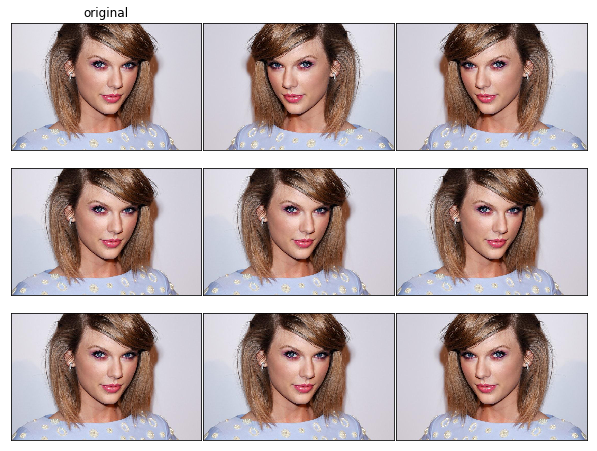

In [133]:
datagen = ImageDataGenerator(horizontal_flip=True)
generate_plot_pics(datagen,orig_img)

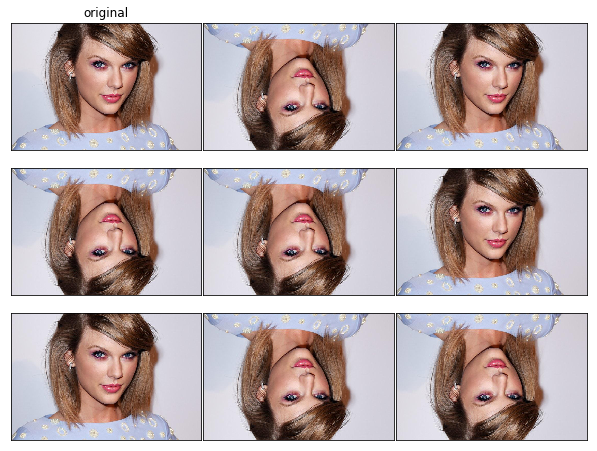

In [145]:
datagen = ImageDataGenerator(vertical_flip=True)
generate_plot_pics(datagen,orig_img)